# Load Modules


In [1]:
import numpy as np
import time
from scipy.ndimage import gaussian_filter
#from suite2p import utils
#from suite2p.extraction import extract
from skimage import io, feature
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
import colorcet as cc
import pandas as pd
from glob import glob
import seaborn as sns
from scipy.spatial.distance import squareform

sns.set_style('ticks')
sns.set_context('talk')
#import seaborn as sns

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)


# restore np.load for future normal usage
#np.load = np_load_old

# Load data and Plot true positives cells only

In [31]:
FOLDER_PATH = "/Volumes/WD_BLACK/Simon/20210816_phase2_passive/668/suite2p/plane2"
saveDataFramePath = '/Volumes/WD_BLACK/Simon/Figures/Single Mouse/FOV/#668'

path1 = os.path.join(FOLDER_PATH, "F.npy")
path2 = os.path.join(FOLDER_PATH, "Fneu.npy")
path3 = os.path.join(FOLDER_PATH, "F_chan2.npy")
path4 = os.path.join(FOLDER_PATH, "Fneu_chan2.npy")
path5 = os.path.join(FOLDER_PATH, "ops.npy")
path6 = os.path.join(FOLDER_PATH, "iscell.npy")
path7 = os.path.join(FOLDER_PATH, "stat.npy")
path8 = os.path.join(FOLDER_PATH, "redcell.npy")


F = np.load(path1)
neu = np.load(path2)
F_chan2 = np.load(path3)
neu_red = np.load(path4)
ops = np.load(path5).item()
iscell = np.load(path6)
stat = np.load(path7)
redcells = np.load(path8)

In [ ]:
#stat = np.load('/Volumes/Simone_2019/DATA/Simon/2P/20200610_odorset1_960/Mouse#164/Analysis/suite2p/plane1/stat.npy')
#ops = np.load('/Volumes/Simone_2019/DATA/Simon/2P/20200610_odorset1_960/Mouse#164/Analysis/suite2p/plane1/ops.npy').item()
#iscell = np.load('/Volumes/Simone_2019/DATA/Simon/2P/20200610_odorset1_960/Mouse#164/Analysis/suite2p/plane1/iscell.npy')
#redcells = np.load('/Volumes/Simone_2019/DATA/Simon/2P/20200610_odorset1_960/Mouse#164/Analysis/suite2p/plane1/redcell.npy')
#F_chan2 = np.load('/Volumes/Simone_2019/DATA/Simon/2P/20200610_odorset1_960/Mouse#164/Analysis/suite2p/plane1/F_chan2.npy')
#F = np.load('/Volumes/Simone_2019/DATA/Simon/2P/20200610_odorset1_960/Mouse#164/Analysis/suite2p/plane1/F.npy')
numcell = len(iscell)
im = np.zeros((ops['Ly'], ops['Lx']))

for n in range(0,numcell):
    if iscell[n, 0] == 1:
        ypix = stat[n]['ypix']#[~stat[n]['overlap']]
        xpix = stat[n]['xpix']#[~stat[n]['overlap']]
        im[ypix,xpix] = n+1

masked_array = np.ma.masked_where(im == 0, im)

cmap = cc.cm.kgy_r  # Can be any colormap that you want after the cm
cmap.set_bad(color='white')

plt.figure(dpi=300, figsize=(2,2))
plt.imshow(masked_array, cmap=cmap)
plt.axis('off')
plt.clim(-100,150)
# path30 = os.path.join(saveDataFramePath, "ROIs_GCaMP_Plane_1.png")
# plt.savefig(path30, transparent = True, dpi = 300, bbox_inches='tight')

In [ ]:
for i in range(0, len(collection)): 
    collection[i] = int(collection[i]) 

In [ ]:

collectionn.astype(int)

In [ ]:
collectionn

In [ ]:
collectionn = collection[:,0,0]
collectionn

In [ ]:
#path9 = os.path.join(saveDataFramePath, "RedCellList.npy")
collection = np.load("/Volumes/Extreme Pro/DATA/2P/20210511_Exp/Mouse#644_odorset2/Analysis/Plane_1/RedCellList.npy")
# # collection = collection.tolist()
collectionn = collection[:,0]
collectionn = collectionn.astype(int)
# for i in range(0, len(collection)): 
#     collection[i] = int(collection[i]) 

imRed = np.zeros((ops['Ly'], ops['Lx']))

for n in collectionn:
    if iscell[n, 0] == 1:
        ypix = stat[n]['ypix']#[~stat[n]['overlap']]
        xpix = stat[n]['xpix']#[~stat[n]['overlap']]
        imRed[ypix,xpix] = n+1

masked_array = np.ma.masked_where(imRed == 0, imRed)

cmap = cc.cm.kr  # Can be any colormap that you want after the cm
cmap.set_bad(color='white')

plt.figure(dpi=300, figsize=(5,5))
plt.imshow(masked_array, cmap=cmap)
#plt.axis('off')
plt.axis('off')
plt.clim(-50,50)
# path31 = os.path.join(saveDataFramePath, "ROIs_tdTomato_Plane_1.png")
# plt.savefig(path31, transparent = True, dpi = 600, bbox_inches='tight')

# Plot Mean image tdTomato cells

In [ ]:
ops

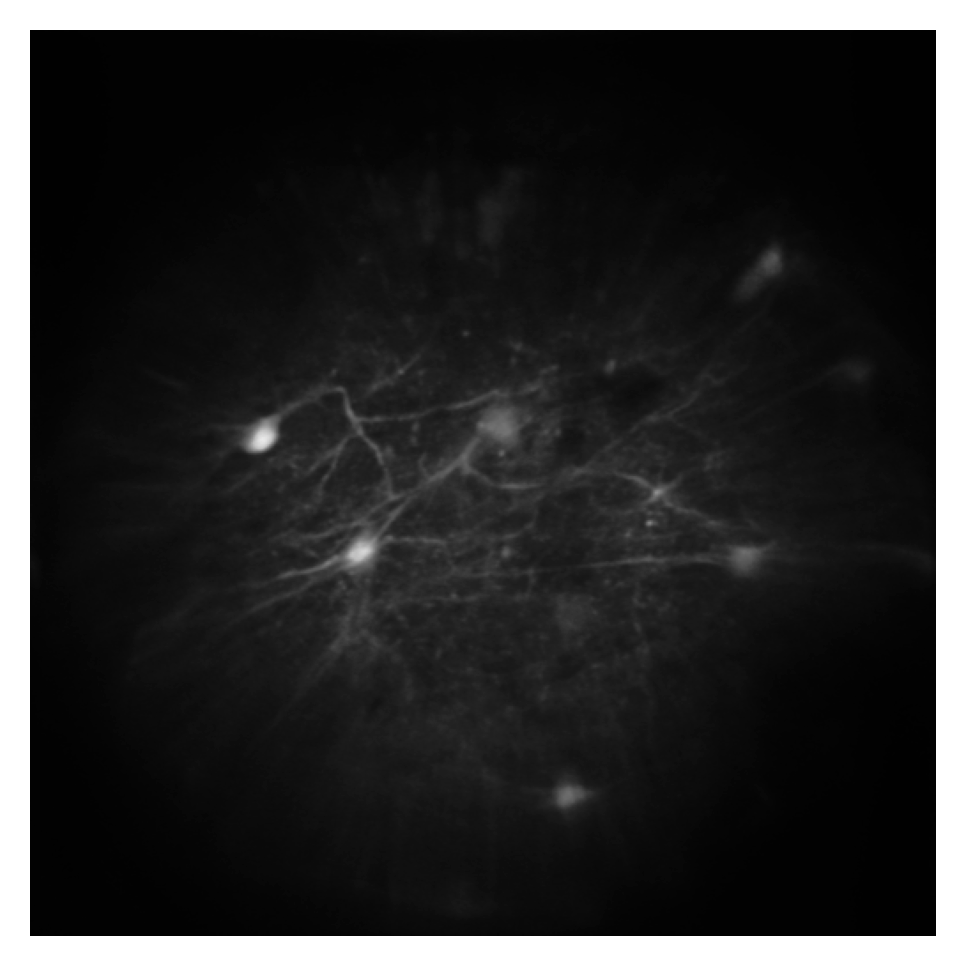

In [33]:
plt.figure(dpi=300)
plt.axis('off')
plt.imshow(ops['meanImg_chan2'], vmin=0, vmax=1200, cmap='Greys_r', alpha=1, aspect='equal')
path32 = os.path.join(saveDataFramePath, "FOV_tdTomato_Plane2.pdf")
plt.savefig(path32, transparent = True, dpi = 300, bbox_inches='tight')

# Plot Mean image GCaMP

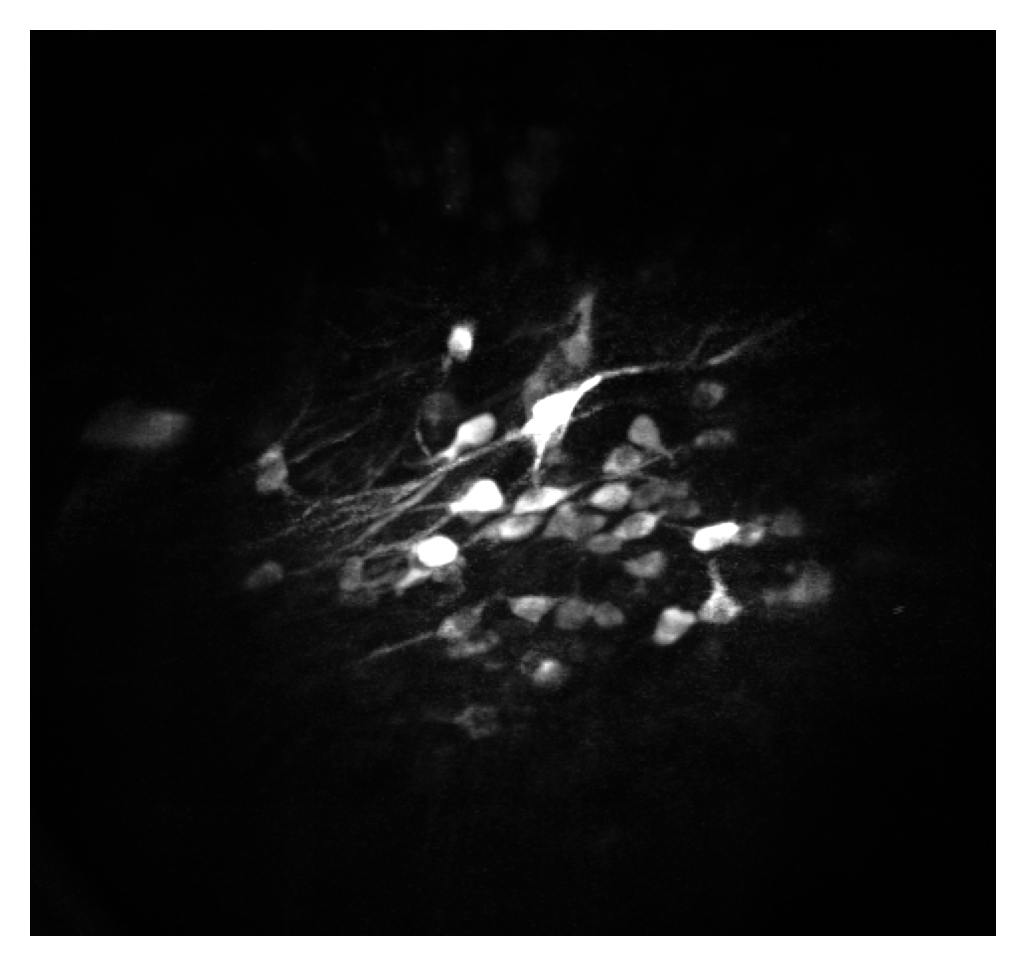

In [36]:
# saveDataFramePath='/Users/sdaste/Desktop/DATA/OB_dataset_Analysis/Figures/Mouse#163_odorset2/New'
plt.figure(dpi=300)
plt.axis('off')
plt.imshow(ops['max_proj'], vmin=0, vmax=1200, cmap='Greys_r', alpha=1)
# plt.imshow(ops['meanImg_chan2'], vmin=0, vmax=1000, cmap='Reds', alpha=0.5, aspect='equal')
# plt.colorbar()
path33 = os.path.join(saveDataFramePath, "FOV_G_Plane2.pdf")
plt.savefig(path33, transparent = True, dpi = 300, bbox_inches='tight')

# Calculate correlation coefficient between the two images

In [ ]:
pearson = np.corrcoef(ops['meanImg'],ops['meanImg_chan2'])
plt.imshow(pearson, vmin=0, vmax=1)

In [ ]:
#compute for each pixel the correlation coefficient between patches centered on this pixel in the two images of interest
#%matplotlib widget

def correlation_coefficient(patch1, patch2):
    product = np.mean((patch1 - patch1.mean()) * (patch2 - patch2.mean()))
    stds = patch1.std() * patch2.std()
    if stds == 0:
        return 0
    else:
        product /= stds
        return product

#im = io.imread('faces.jpg', as_grey=True)

im1 = ops['meanImg']
sh_row, sh_col = im1.shape
im2 = ops['meanImg_chan2_corrected']

# Registration of the two images
translation = feature.register_translation(im1, im2, upsample_factor=10)[0]
im2_register = ndimage.shift(im2, translation)

d = 1

correlation = np.zeros_like(im1)

for i in range(d, sh_row - (d + 1)):
    for j in range(d, sh_col - (d + 1)):
        correlation[i, j] = correlation_coefficient(im1[i - d: i + d + 1,
                                                        j - d: j + d + 1],
                                                    im2[i - d: i + d + 1,
                                                        j - d: j + d + 1])
#sns.heatmap(correlation,  vmax = 1, vmin = -1, cmap='inferno')
#io.figure(figsize = (512,512))
plt.figure(dpi=300)
io.imshow(correlation, cmap='inferno')
io.show()
io.imsave('/Users/sdaste/Desktop/test',correlation)

In [ ]:
dffsred = pd.read_csv("/Volumes/Simon_2018/DATA/2P/RAW/20200124/Mouse#164/exp/Concatenated/dffsall.csv")

dffsred = dffsred.loc[:, ~dffsred.columns.str.contains("^Unnamed")]  # remove unnamed column from dataframe
dffsred

In [ ]:
# Select only red cells (yet, need to be manually defined before..)

%matplotlib widget
dffsred = dffsred.loc[:, ["plane_", "plane_", "plane_", "plane_", "plane_", "plane_", "plane_", "plane_", "plane_", "plane_", "odor", "Trial Number"]]  # choose the red cells based on their suite2p id

check_cell = dffsred.loc[:, "plane3_6"]  # change the name of the cell to check them
plt.plot(check_cell)

In [ ]:
Z = (finalmatrix.loc[finalmatrix['odor'] == 1])
Z

In [ ]:
'''
identify cells with channel 2 brightness (aka red cells)
main function is detect
takes from ops: 'meanImg', 'meanImg_chan2', 'Ly', 'Lx'
takes from stat: 'ypix', 'xpix', 'lam'
'''

def quadrant_mask(Ly,Lx,ny,nx,sT):
    mask = np.zeros((Ly,Lx), np.float32)
    mask[np.ix_(ny,nx)] = 1
    mask = gaussian_filter(mask, sT)
    return mask

def correct_bleedthrough(Ly, Lx, nblks, mimg, mimg2):
    # subtract bleedthrough of green into red channel
    # non-rigid regression with nblks x nblks pieces
    sT = np.round((Ly + Lx) / (nblks*2) * 0.25)
    mask = np.zeros((Ly, Lx, nblks, nblks), np.float32)
    weights = np.zeros((nblks, nblks), np.float32)
    yb = np.linspace(0, Ly, nblks+1).astype(int)
    xb = np.linspace(0, Lx, nblks+1).astype(int)
    for iy in range(nblks):
        for ix in range(nblks):
            ny = np.arange(yb[iy], yb[iy+1]).astype(int)
            nx = np.arange(xb[ix], xb[ix+1]).astype(int)
            mask[:,:,iy,ix] = quadrant_mask(Ly, Lx, ny, nx, sT)
            x  = mimg[np.ix_(ny,nx)].flatten()
            x2  = mimg2[np.ix_(ny,nx)].flatten()
            # predict chan2 from chan1
            a = (x * x2).sum() / (x * x).sum()
            weights[iy,ix] = a
    mask /= mask.sum(axis=-1).sum(axis=-1)[:,:,np.newaxis,np.newaxis]
    mask *= weights
    mask *= mimg[:,:,np.newaxis,np.newaxis]
    mimg2 -= mask.sum(axis=-1).sum(axis=-1)
    mimg2 = np.maximum(0, mimg2)
    return mimg2

def detect(ops, stat):
    #ops2 = ops.copy()
    mimg = ops['meanImg'].copy()
    mimg2 = ops['meanImg_chan2'].copy()

    # subtract bleedthrough of green into red channel
    # non-rigid regression with nblks x nblks pieces
    nblks = 3
    Ly = ops['Ly']
    Lx = ops['Lx']
    mimg2_corr = correct_bleedthrough(Ly, Lx, nblks, mimg, mimg2)
    ops['meanImg_chan2_corrected'] = mimg2_corr

    # compute pixels in cell and in area around cell (including overlaps)
    # (exclude pixels from other cells)
    # ops['min_neuropil_pixels'] = 80
    _, cell_pix, cell_masks = extract.masks.create_cell_masks(ops, stat)
    neuropil_masks = extract.masks.create_neuropil_masks(ops, stat, cell_pix)
    neuropil_masks = np.reshape(neuropil_masks,(-1,Ly*Lx))
    cell_masks     = np.reshape(cell_masks,(-1,Ly*Lx))

    inpix = cell_masks @ mimg2.flatten()
    extpix = neuropil_masks @ mimg2.flatten()
    inpix = np.maximum(1e-3, inpix)
    redprob = inpix / (inpix + extpix)
    redcell = redprob > ops['chan2_thres']

    redcell = np.concatenate((redcell[:,np.newaxis], redprob[:,np.newaxis]), axis=1)

    return ops, redcell

In [ ]:
F = np.load('/Volumes/Simon_2018/DATA/2P/RAW/20200318/Mouse#9_set2/Exp/suite2p/combined/F.npy')
Fneu = np.load('/Volumes/Simon_2018/DATA/2P/RAW/20200318/Mouse#9_set2/Exp/suite2p/combined/Fneu.npy')
spks = np.load('/Volumes/Simon_2018/DATA/2P/RAW/20200318/Mouse#9_set2/Exp/suite2p/combined/spks.npy')
stat = np.load('/Volumes/Simon_2018/DATA/2P/RAW/20200318/Mouse#9_set2/Exp/suite2p/combined/stat.npy')
ops =  np.load('/Volumes/Simon_2018/DATA/2P/RAW/20200318/Mouse#9_set2/Exp/suite2p/combined/ops.npy')
ops = ops.item()
iscell = np.load('/Volumes/Simon_2018/DATA/2P/RAW/20200318/Mouse#9_set2/Exp/suite2p/combined/iscell.npy')

In [ ]:
detect(ops, stat)

In [ ]:
Ly = ops['Ly']
Lx = ops['Lx']
# ny = stat['ny']
# nx = stat['nx']

In [ ]:
quadrant_mask(Ly,Lx,ny)

In [ ]:
im = np.zeros((ops['Ly'], ops['Lx']))

In [ ]:
redcells = np.load('/Volumes/Simon_2018/DATA/2P/RAW/20200318/Mouse#9_set2/Exp/suite2p/combined/redcell.npy')

In [ ]:
redcells

In [ ]:
plt.redcells()

In [ ]:
iscell = np.load('/Volumes/Simon_2018/DATA/2P/RAW/20200318/Mouse#9_set2/Exp/suite2p/combined/iscell.npy')
iscell = iscell[:,0]
iscell

In [ ]:
import matplotlib.pyplot as plt
stat = np.load('/Volumes/Simon_2018/DATA/2P/RAW/20200318/Mouse#9_set2/Exp/suite2p/combined/stat.npy')
ops = np.load('/Volumes/Simon_2018/DATA/2P/RAW/20200318/Mouse#9_set2/Exp/suite2p/combined/ops.npy').item()
iscell = np.load('/Volumes/Simon_2018/DATA/2P/RAW/20200318/Mouse#9_set2/Exp/suite2p/combined/iscell.npy')
numcell = len(iscell)
im = np.zeros((ops['Ly'], ops['Lx']))

for n in range(0,numcell):
    if iscell[n, 0] == 1:
        ypix = stat[n]['ypix']#[~stat[n]['overlap']]
        xpix = stat[n]['xpix']#[~stat[n]['overlap']]
        im[ypix,xpix] = n+1

plt.imshow(im,cmap='inferno')
plt.show()

In [ ]:
stat[2]['med']

In [ ]:
plt.imshow(ops['meanImg_chan2'], vmin=0, vmax=1000)

In [ ]:
ops['meanImg'].shape

In [ ]:
pearson = np.corrcoef(ops['meanImg'],ops['meanImg_chan2'])
plt.imshow(pearson, vmin=-0.5, vmax=1)

In [ ]:
ops['meanImg'].size

In [ ]:
stat = np.load('/Volumes/Simon_2018/DATA/2P/RAW/20200318/Mouse#9_set2/Exp/suite2p/plane1/stat.npy')
ops = np.load('/Volumes/Simon_2018/DATA/2P/RAW/20200318/Mouse#9_set2/Exp/suite2p/plane1/ops.npy').item()

In [ ]:
#compute for each pixel the correlation coefficient between patches centered on this pixel in the two images of interest
#%matplotlib widget

def correlation_coefficient(patch1, patch2):
    product = np.mean((patch1 - patch1.mean()) * (patch2 - patch2.mean()))
    stds = patch1.std() * patch2.std()
    if stds == 0:
        return 0
    else:
        product /= stds
        return product

#im = io.imread('faces.jpg', as_grey=True)

im1 = ops['meanImg']
sh_row, sh_col = im1.shape
im2 = ops['meanImg_chan2_corrected']

# Registration of the two images
translation = feature.register_translation(im1, im2, upsample_factor=10)[0]
im2_register = ndimage.shift(im2, translation)

d = 1

correlation = np.zeros_like(im1)

for i in range(d, sh_row - (d + 1)):
    for j in range(d, sh_col - (d + 1)):
        correlation[i, j] = correlation_coefficient(im1[i - d: i + d + 1,
                                                        j - d: j + d + 1],
                                                    im2[i - d: i + d + 1,
                                                        j - d: j + d + 1])
#sns.heatmap(correlation,  vmax = 1, vmin = -1, cmap='inferno')
#io.figure(figsize = (512,512))
io.imshow(correlation, cmap='inferno')
io.show()
io.imsave('/Users/sdaste/Desktop/test',correlation)

# Concatenation

In [ ]:
FilteredDataArray_Red1 = np.load('/Volumes/Simon_2018/DATA/2P/ANALYSIS/DataSet/Set2/Mouse#163/Plane_1/DataArray.npy')
FilteredDataArray_Red2 = np.load('/Volumes/Simon_2018/DATA/2P/ANALYSIS/DataSet/Set2/Mouse#163/Plane_2/DataArray.npy')
FilteredDataArray_Red3 = np.load('/Volumes/Simon_2018/DATA/2P/ANALYSIS/DataSet/Set2/Mouse#163/Plane_3/DataArray.npy')

In [ ]:
FilteredDataArray_Red3.shape

In [ ]:
FilteredDataArray_Red = np.concatenate((FilteredDataArray_Red1,FilteredDataArray_Red2,FilteredDataArray_Red3), axis=0)
FilteredDataArray_Red.shape

In [ ]:
Redcellsmean= FilteredDataArray_Red.mean(1)

In [ ]:
Redcellsmean= FilteredDataArray_Red.mean(1)
Redcellsmean= Redcellsmean.mean(1)
Redcellsmean= Redcellsmean[...,0:45]
Redcellsmean=Redcellsmean.mean(1)
Redcellsmean.shape
gh=plt.hist(Redcellsmean, bins = 30)
plt.title('Mean Fluorescence distribution baseline - GCaMP')
plt.xlabel('Fluoresence value - SD')
plt.ylabel('percentage of cells')

In [ ]:
Redcellsmean

In [ ]:
odor = FilteredDataArray_Red[...,45:60].mean(-1)
bline = FilteredDataArray_Red[...,25:40].mean(-1)
respscorr= odor-bline

In [ ]:
### What is the pairwise similarity (correlation) between each trial-odor population response. 
# Rows and columns are sorted... all trials odor 1, then all trials odor 2, etc.  
plt.figure(figsize=(15,15))
sns.heatmap(np.corrcoef(respscorr.transpose(0,2,1).reshape(respscorr.shape[0],-1).T[:]), square = True, xticklabels=[], yticklabels=[])
for i in range(10):
    plt.axvline(8*i+8, color = 'w', linewidth = 1)
    plt.axhline(8*i+8, color = 'w', linewidth = 1)


In [ ]:
io.imsave('/Users/sdaste/Desktop/test.png',correlation)

In [ ]:
parent = {
    'Sroi': [],
    'Lam': [],
    'LamNorm': [],
    'LamMean': [],
    'iROI': [],
    'RGB': [],

}

from masks_for_figure import init_masks

def init_masks():
    """
    creates RGB masks using stat and puts them in M0 or M1 depending on
    whether or not iscell is True for a given ROI
    args:
        ops: mean_image, Vcorr
        stat: xpix,ypix,xext,yext
        iscell: vector with True if ROI is cell
        ops_plot: plotROI, view, color, randcols
    outputs:
        M0: ROIs that are True in iscell
        M1: ROIs that are False in iscell

    """
    stat = np.load('/Volumes/Simon_2018/DATA/2P/RAW/20200318/Mouse#9_set2/Exp/suite2p/plane1/stat.npy')
    iscell = np.load('/Volumes/Simon_2018/DATA/2P/RAW/20200318/Mouse#9_set2/Exp/suite2p/plane1/iscell.npy')
    ops = np.load('/Volumes/Simon_2018/DATA/2P/RAW/20200318/Mouse#9_set2/Exp/suite2p/plane1/ops.npy').item()
    i = 
    #cols = (255 * hsv_to_rgb(cols)).astype(np.uint8)
    ncells = len(stat)
    Ly = ops['Ly']
    Lx = ops['Lx']
    parent['Sroi']   = np.zeros((2,Ly,Lx), np.bool)
    LamAll = np.zeros((Ly,Lx), np.float32)
    # these have 3 layers
    parent['Lam']    = np.zeros((2,3,Ly,Lx), np.float32)
    parent['iROI']   = -1 * np.ones((2,3,Ly,Lx), np.int32)

    # ignore merged cells
    iignore = np.zeros(ncells, np.bool)
    for n in np.arange(ncells-1,-1,-1,int):
        ypix = stat[n]['ypix']
        if ypix is not None and not iignore[n]:
            if 'imerge' in stat[n]:
                for k in stat[n]['imerge']:
                    iignore[k] = True
                    print(k)
            xpix = stat[n]['xpix']
            lam = stat[n]['lam']
            lam = lam / lam.sum()
            i = np.int16(1-iscell[n])
            # add cell on top
            parent['iROI'][i,2,ypix,xpix] = parent['iROI'][i,1,ypix,xpix]
            parent['iROI'][i,1,ypix,xpix] = parent['iROI'][i,0,ypix,xpix]
            parent['iROI'][i,0,ypix,xpix] = n

            # add weighting to all layers
            parent['Lam'][i,2,ypix,xpix] = parent['Lam'][i,1,ypix,xpix]
            parent['Lam'][i,1,ypix,xpix] = parent['Lam'][i,0,ypix,xpix]
            parent['Lam'][i,0,ypix,xpix] = lam
            parent['Sroi'][i,ypix,xpix] = 1
            LamAll[ypix,xpix] = lam

    parent['LamMean'] = LamAll[LamAll>1e-10].mean()
    parent['LamNorm'] = np.maximum(0, np.minimum(1, 0.75*parent.rois['Lam'][:,0]/parent.rois['LamMean']))
    parent['RGB'] = np.zeros((2,cols.shape[0],Ly,Lx,4), np.uint8)

    for c in range(0, cols.shape[0]):
        rgb_masks(parent, cols[c], c)


In [ ]:
init_masks(parent)

In [ ]:
parent['LamMean']

In [ ]:
iscell = np.load('/Volumes/Simon_2018/DATA/2P/RAW/20200318/Mouse#9_set2/Exp/suite2p/plane1/iscell.npy')
iscell = iscell[:,0]
iscell

In [ ]:
     """
    creates RGB masks using stat and puts them in M0 or M1 depending on
    whether or not iscell is True for a given ROI
    args:
        ops: mean_image, Vcorr
        stat: xpix,ypix,xext,yext
        iscell: vector with True if ROI is cell
        ops_plot: plotROI, view, color, randcols
    outputs:
        M0: ROIs that are True in iscell
        M1: ROIs that are False in iscell

    """
stat = np.load('/Volumes/Simon_2018/DATA/2P/RAW/20200318/Mouse#9_set2/Exp/suite2p/plane1/stat.npy')
iscell = np.load('/Volumes/Simon_2018/DATA/2P/RAW/20200318/Mouse#9_set2/Exp/suite2p/plane1/iscell.npy')
ops = np.load('/Volumes/Simon_2018/DATA/2P/RAW/20200318/Mouse#9_set2/Exp/suite2p/plane1/ops.npy').item()
cols = parent.colors['cols']
ncells = len(stat)
Ly = ops['Ly']
Lx = ops['Lx']
parent.rois['Sroi']   = np.zeros((2,Ly,Lx), np.bool)
LamAll = np.zeros((Ly,Lx), np.float32)
# these have 3 layers
parent.rois['Lam']    = np.zeros((2,3,Ly,Lx), np.float32)
parent.rois['iROI']   = -1 * np.ones((2,3,Ly,Lx), np.int32)

# ignore merged cells
iignore = np.zeros(ncells, np.bool)
for n in np.arange(ncells-1,-1,-1,int):
    ypix = stat[n]['ypix']
    if ypix is not None and not iignore[n]:
        if 'imerge' in stat[n]:
            for k in stat[n]['imerge']:
                    iignore[k] = True
                    print(k)
        xpix = stat[n]['xpix']
        lam = stat[n]['lam']
        lam = lam / lam.sum()
        i = int(1-iscell[n])
        # add cell on top
        parent.rois['iROI'][i,2,ypix,xpix] = parent.rois['iROI'][i,1,ypix,xpix]
        parent.rois['iROI'][i,1,ypix,xpix] = parent.rois['iROI'][i,0,ypix,xpix]
        parent.rois['iROI'][i,0,ypix,xpix] = n

        # add weighting to all layers
        parent.rois['Lam'][i,2,ypix,xpix] = parent.rois['Lam'][i,1,ypix,xpix]
        parent.rois['Lam'][i,1,ypix,xpix] = parent.rois['Lam'][i,0,ypix,xpix]
        parent.rois['Lam'][i,0,ypix,xpix] = lam
        parent.rois['Sroi'][i,ypix,xpix] = 1
        LamAll[ypix,xpix] = lam

parent.rois['LamMean'] = LamAll[LamAll>1e-10].mean()
parent.rois['LamNorm'] = np.maximum(0, np.minimum(1, 0.75*parent.rois['Lam'][:,0]/parent.rois['LamMean']))
parent.colors['RGB'] = np.zeros((2,cols.shape[0],Ly,Lx,4), np.uint8)

for c in range(0, cols.shape[0]):
    rgb_masks(parent, cols[c], c)

In [ ]:
def init_masks(parent):
    """
    creates RGB masks using stat and puts them in M0 or M1 depending on
    whether or not iscell is True for a given ROI
    args:
        ops: mean_image, Vcorr
        stat: xpix,ypix,xext,yext
        iscell: vector with True if ROI is cell
        ops_plot: plotROI, view, color, randcols
    outputs:
        M0: ROIs that are True in iscell
        M1: ROIs that are False in iscell

    """
    stat = parent.stat
    iscell = parent.iscell
    cols = parent.colors['cols']
    ncells = len(stat)
    Ly = parent.Ly
    Lx = parent.Lx
    parent.rois['Sroi']   = np.zeros((2,Ly,Lx), np.bool)
    LamAll = np.zeros((Ly,Lx), np.float32)
    # these have 3 layers
    parent.rois['Lam']    = np.zeros((2,3,Ly,Lx), np.float32)
    parent.rois['iROI']   = -1 * np.ones((2,3,Ly,Lx), np.int32)

    # ignore merged cells
    iignore = np.zeros(ncells, np.bool)
    for n in np.arange(ncells-1,-1,-1,int):
        ypix = stat[n]['ypix']
        if ypix is not None and not iignore[n]:
            if 'imerge' in stat[n]:
                for k in stat[n]['imerge']:
                    iignore[k] = True
                    print(k)
            xpix = stat[n]['xpix']
            lam = stat[n]['lam']
            lam = lam / lam.sum()
            i = int(1-iscell[n])
            # add cell on top
            parent.rois['iROI'][i,2,ypix,xpix] = parent.rois['iROI'][i,1,ypix,xpix]
            parent.rois['iROI'][i,1,ypix,xpix] = parent.rois['iROI'][i,0,ypix,xpix]
            parent.rois['iROI'][i,0,ypix,xpix] = n

            # add weighting to all layers
            parent.rois['Lam'][i,2,ypix,xpix] = parent.rois['Lam'][i,1,ypix,xpix]
            parent.rois['Lam'][i,1,ypix,xpix] = parent.rois['Lam'][i,0,ypix,xpix]
            parent.rois['Lam'][i,0,ypix,xpix] = lam
            parent.rois['Sroi'][i,ypix,xpix] = 1
            LamAll[ypix,xpix] = lam

    parent.rois['LamMean'] = LamAll[LamAll>1e-10].mean()
    parent.rois['LamNorm'] = np.maximum(0, np.minimum(1, 0.75*parent.rois['Lam'][:,0]/parent.rois['LamMean']))
    parent.colors['RGB'] = np.zeros((2,cols.shape[0],Ly,Lx,4), np.uint8)

    for c in range(0, cols.shape[0]):
        rgb_masks(parent, cols[c], c)

def rgb_masks(parent, col, c):
    for i in range(2):
        #S = np.expand_dims(parent.rois['Sroi'][i],axis=2)
        H = col[parent.rois['iROI'][i,0], :]
        #H = np.expand_dims(H,axis=2)
        #hsv = np.concatenate((H,S,S),axis=2)
        #rgb = (hsv_to_rgb(hsv)*255).astype(np.uint8)
        parent.colors['RGB'][i,c,:,:,:3] = H

def draw_masks(parent): #ops, stat, ops_plot, iscell, ichosen):
    '''

    creates RGB masks using stat and puts them in M0 or M1 depending on
    whether or not iscell is True for a given ROI
    args:
        ops: mean_image, Vcorr
        stat: xpix,ypix
        iscell: vector with True if ROI is cell
        ops_plot: plotROI, view, color, randcols
    outputs:
        M0: ROIs that are True in iscell
        M1: ROIs that are False in iscell

    '''
    ncells  = parent.iscell.shape[0]
    plotROI = parent.ops_plot['ROIs_on']
    view    = parent.ops_plot['view']
    color   = parent.ops_plot['color']
    opacity    = parent.ops_plot['opacity']

    wplot   = int(1-parent.iscell[parent.ichosen])
    # reset transparency
    for i in range(2):
        parent.colors['RGB'][i,color,:,:,3] = (opacity[view==0] *
                                               parent.rois['Sroi'][i] *
                                               parent.rois['LamNorm'][i]).astype(np.uint8)
    M = [np.array(parent.colors['RGB'][0,color]), np.array(parent.colors['RGB'][1,color])]

    if view==0:
        for n in parent.imerge:
            ypix = parent.stat[n]['ypix'].flatten()
            xpix = parent.stat[n]['xpix'].flatten()
            v = (parent.rois['iROI'][wplot][:,ypix,xpix]>-1).sum(axis=0) - 1
            v = 1 - v/3
            M[wplot] = make_chosen_ROI(M[wplot], ypix, xpix, v)
    else:
        for n in parent.imerge:
            ycirc = parent.stat[n]['ycirc']
            xcirc = parent.stat[n]['xcirc']
            ypix = parent.stat[n]['ypix'].flatten()
            xpix = parent.stat[n]['xpix'].flatten()
            M[wplot][ypix,xpix,3] = 0
            col = parent.colors['cols'][color,n]
            sat = 1
            M[wplot] = make_chosen_circle(M[wplot], ycirc, xcirc, col, sat)

    return M[0],M[1]


def make_chosen_ROI(M0, ypix, xpix, v):
    M0[ypix,xpix,:] = np.tile((255*v[:,np.newaxis]).astype(np.uint8), (1,4))
    return M0

def make_chosen_circle(M0, ycirc, xcirc, col, sat):
    ncirc = ycirc.size
    M0[ycirc,xcirc,:3] = col#[np.newaxis,:]
    M0[ycirc,xcirc,3]  = 255
    return M0